# Mega-Mart Sales Analysis

This notebook will contain the preliminary analysis of the Mega-Mart dataset. We are going to understand what kind of impact each feature is going to have on the Sales.

Features in the dataset are:

(1) Item_ID - ID of each item based on its category (Food, Non-Consumables, Drinks)

(2) Item_W - Weight of each item

(3) Item_Type - Sub-Category type of the item

(4) Item_MRP - Price of each item

(5) Outlet_ID - Unique ID assigned to each outlet

(6) Outlet_Year - Sales of each outlet in every year

(6) Outlet_Size - Type of size of the outlet (Small, Medium and Large)

(7) Outlet_Location_Type - Location at which the outlets are present (Tier 1, Tier 2 and Tier 3)

(8) Sales - Sales of each item at each outlet

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_csv("train.csv")
df

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
...,...,...,...,...,...,...,...,...,...
87859,FDG24,9.994412,Breakfast,147.389893,OUT035,1987,Medium,Tier 3,4975.646052
87860,FDA32,11.259252,Canned,127.965666,OUT049,1987,Medium,Tier 2,2252.492755
87861,FDM04,11.385812,Household,119.028901,OUT018,1997,Medium,Tier 1,2716.058050
87862,NCS18,18.018028,Household,223.416318,OUT018,1988,Medium,Tier 3,991.857233


## Analyzing the dataset

To understand the basic statistical characteristics of the dataset we use describe function from the Pandas library.

In the output of the describe function, in the Sales column we can see that we have negative values. Since negative sales is not possible we need to filter out those rows from the dataset which consists of these values before going into the further analysis.

In [3]:
df.describe()

,Item_W,Item_MRP,Outlet_Year,Sales
count,87864.000000,87864.000000,87864.00000,87864.000000
mean,15.591469,151.242943,1999.87063,1911.842120
std,4.364429,59.536366,6.63429,1291.386004
min,7.992700,32.910015,1987.00000,-1229.360345
25%,10.968658,112.423337,1997.00000,959.249675
50%,15.831170,145.581473,1999.00000,1606.307877
75%,19.969936,197.110367,2004.00000,2608.057736
max,21.250000,265.214271,2009.00000,10309.283310


## Checking if the dataset has any null values

In this we can see that there are no null values in the dataset, so we can now proceed to filter the rows of the dataset with negative values.

In [4]:
df.isna().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [5]:
df = df[(df['Sales']>0)]
df

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
...,...,...,...,...,...,...,...,...,...
87859,FDG24,9.994412,Breakfast,147.389893,OUT035,1987,Medium,Tier 3,4975.646052
87860,FDA32,11.259252,Canned,127.965666,OUT049,1987,Medium,Tier 2,2252.492755
87861,FDM04,11.385812,Household,119.028901,OUT018,1997,Medium,Tier 1,2716.058050
87862,NCS18,18.018028,Household,223.416318,OUT018,1988,Medium,Tier 3,991.857233


## Outlier Detection

### What is an outlier?
An outlier is a point or a set of points that are distant from other points in the dataset. 

### Causes of outliers
It can be caused due to various reasons such as error in capturing the data, errors while manually entering the data, errors in processing or manipulating the data etc.

### Effects of outliers
Outliers can skew the overall trend in the data. Outliers in the training data can skew the model, thus affecting its accuracy.

### Methods to detect outliers
There are many methods to detect the outliers. Some of the commonly used techniques are:

(1) Z-Score

(2) Box-Plot

(3) Inter-Quartile Range

(4) Isolation Forests

### Box Plot

In this we can see that there is only one record that is distant away from the rest of the data points, thus it can be considered as an outlier. Before we decide how to treat this outlier, it becomes important to understand which record is involved in this huge sale.

Text(0.5, 1.0, 'Boxplot of Sales of the products ')

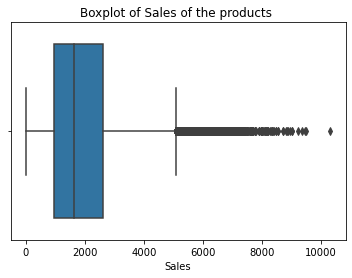

In [6]:
sns.boxplot(data=df,x=df["Sales"])
plt.title("Boxplot of Sales of the products ")

Here we can see that the "soft drink" category has made the highest amount of sales. This is interesting, and there could be a number of reasons for this huge sale. Or it can be an entry error. It might skew our analysis a little bit, thus to keep all the data points in the same range we are going to delete this record.

In [7]:
rslt_df = df[df['Sales'] > 10000]
rslt_df

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
65833,FDF05,14.288374,Soft Drinks,249.247322,OUT018,1998,Medium,Tier 3,10309.28331


In [8]:
df = df[df.Sales < 10000]
print(df)

      Item_ID     Item_W      Item_Type    Item_MRP Outlet_ID  Outlet_Year  \
0       FDU32  21.027499   Baking Goods  197.352319    OUT046         2004   
1       NCT54  21.102371           Meat  148.250214    OUT035         1987   
2       FDW08  20.882263    Hard Drinks  205.465010    OUT035         1999   
3       FDJ22  21.050435  Starchy Foods  253.417583    OUT046         1996   
4       FDF47  21.247876   Baking Goods  240.871039    OUT035         1988   
...       ...        ...            ...         ...       ...          ...   
87859   FDG24   9.994412      Breakfast  147.389893    OUT035         1987   
87860   FDA32  11.259252         Canned  127.965666    OUT049         1987   
87861   FDM04  11.385812      Household  119.028901    OUT018         1997   
87862   NCS18  18.018028      Household  223.416318    OUT018         1988   
87863   FDQ11  17.130290    Snack Foods  143.232048    OUT013         1997   

      Outlet_Size Outlet_Location_Type        Sales  
0        

Let us now understand what are the different categories that are in the data and also what are the most frequently occuring items present in the dataset.

In [9]:
df["Item_ID"].value_counts()

FDE11    417
NCE07    360
NCL18    345
NCO06    334
FDD51    327
        ... 
FDM15      2
FDB20      2
DRF60      2
NCM19      1
FDA22      1
Name: Item_ID, Length: 895, dtype: int64

In [10]:
df["Item_Type"].unique()

array(['Baking Goods', 'Meat', 'Hard Drinks', 'Starchy Foods', 'Breads',
       'Others', 'Seafood', 'Fruits and Vegetables', 'Soft Drinks',
       'Household', 'Snack Foods', 'Frozen Foods', 'Health and Hygiene',
       'Canned', 'Dairy', 'Breakfast'], dtype=object)

Baking goods seem to be the most frequently occuring item in the dataset. Breakfast item seem to be the least occuring item.

In [11]:
df["Item_Type"].value_counts()

Baking Goods             14603
Fruits and Vegetables    14245
Meat                      8063
Snack Foods               7773
Household                 5988
Soft Drinks               5384
Frozen Foods              5114
Canned                    4544
Dairy                     3781
Others                    3674
Breads                    3499
Hard Drinks               3115
Health and Hygiene        2984
Starchy Foods             2960
Seafood                   1104
Breakfast                  635
Name: Item_Type, dtype: int64

In [12]:
df["Outlet_Location_Type"].unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

In [13]:
df["Outlet_Location_Type"].value_counts()

Tier 1    33436
Tier 3    28864
Tier 2    25166
Name: Outlet_Location_Type, dtype: int64

In [14]:
df["Outlet_ID"].unique()

array(['OUT046', 'OUT035', 'OUT049', 'OUT018', 'OUT013'], dtype=object)

In [15]:
df["Outlet_ID"].value_counts()

OUT035    23988
OUT046    20754
OUT018    17022
OUT049    13304
OUT013    12398
Name: Outlet_ID, dtype: int64

In [16]:
df["Outlet_Year"].sort_values().unique()

array([1987, 1988, 1996, 1997, 1998, 1999, 2003, 2004, 2005, 2007, 2008,
       2009], dtype=int64)

In [17]:
df["Outlet_Size"].unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [18]:
df["Outlet_Size"].value_counts()

Small     48431
Medium    26502
High      12533
Name: Outlet_Size, dtype: int64

## Exploratory Data Analysis

EDA or Exploratory Data Analysis is the next step in the pipeline. In this step we understand the dataset in detail graphically. This serves as an important step as we tend to understand the trend in the data, patterns, distributions and any other interesting insights can be found. Effective pre-processing step can generate great results while performing this step.

We can confirm here that for the "Item_Type" column, the leading category is "Baking Goods", closely followed by "Fruits and Vegetables". Least categories are "Seafood" and "Breakfast".

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

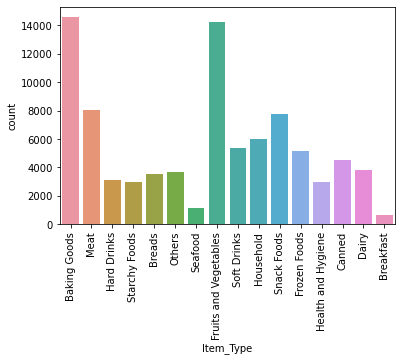

In [19]:
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)

Well this is surprising! Although Breakfast was the least count of category, it has the highest impact on sales, although they were the least categorized item count which we saw in the previous graph, with the least being fruits and vegetables although they were the 2nd most frequently occured item in the dataset. With this we can conclude that the frequent occuring items may not have a direct impact on the sales.

This can be due to various reasons such as high availability and variety of breakfast cereals and other breakfast related items in the mart. Whereas for the fruits and vegetables, people usually purchase it from the local vendors compared to marts, thus might see a relatively lower sales compared to other items.

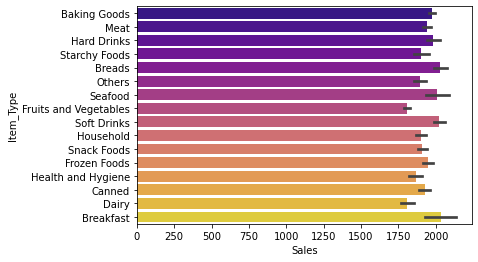

In [20]:
sns.barplot(x ='Sales', y ='Item_Type', data = df, palette ='plasma')

In this chart, we are trying to see which is the most frequently occuring tier in the dataset. Tiers basically lets us know the type of geographical location the mart is located in. In this case "Tier 1" is the most frequently occuring location type. 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

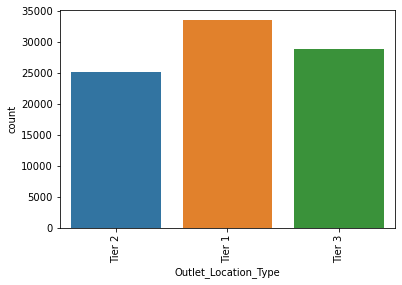

In [21]:
sns.countplot(df.Outlet_Location_Type)
plt.xticks(rotation=90)

In this plot we can see that "Tier 2" and "Tier 1" have competing sales whereas "Tier 3" has a relatively lesser sales. This can be understandable since people generally tend to prefer purchasing items from the marts thus having higher sales. This could also be due to the number of outlets being higher in these locations thus attributing to the increased sales as well.

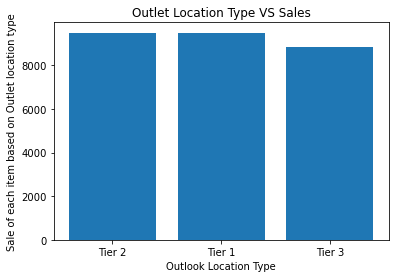

In [22]:
plt.bar(df["Outlet_Location_Type"],df["Sales"])
plt.title('Outlet Location Type VS Sales')
plt.xlabel('Outlook Location Type')
plt.ylabel('Sale of each item based on Outlet location type')
plt.show()

In this chart, we are trying to see which is the most frequently occuring outlet size in the dataset. Outlet size allows us to determine the impact on the sales on a finer level. With more variety in items, larger outlets have an advantage of having higher sales compared to the smaller outlets

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

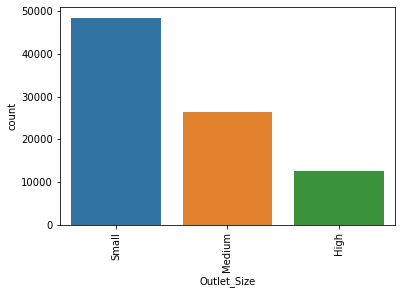

In [23]:
sns.countplot(df.Outlet_Size)
plt.xticks(rotation=90)

In this case we can see that "smaller" outlets have larger sales compared to other two outlet sizes. This can be due to the amount of smaller outlets present in the dataset is greater than the other two. Although it is not surprising that the sales of large sized outlets doing better in terms of sales compared to medium sized outlets considering our initial assumption.

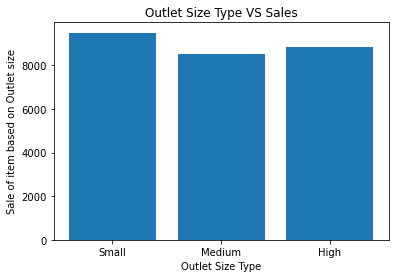

In [24]:
plt.bar(df["Outlet_Size"],df["Sales"])
plt.title('Outlet Size Type VS Sales')
plt.xlabel('Outlet Size Type')
plt.ylabel('Sale of item based on Outlet size')
plt.show()

In this chart, we are trying to see how each outlet ID is doing in terms of sales. As we can see "Outlet ID 013" is doing well in terms of sales where as "Outlet ID 018" is faring poorly in the same. This can be due to various reasons such as competitions from other marts, its location, ease of vehicle parking, choice of items etc.

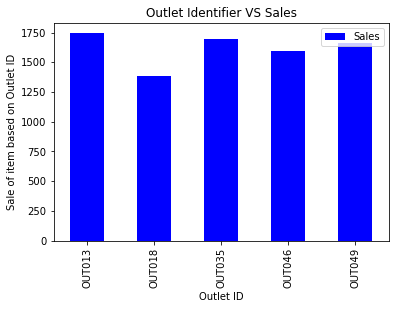

In [25]:
Outlet_ID_pivot = df.pivot_table(index='Outlet_ID', values="Sales", aggfunc=np.median)

Outlet_ID_pivot.plot(kind='bar', color='blue', fig=(8,8))

plt.title('Outlet Identifier VS Sales')
plt.xlabel('Outlet ID')
plt.ylabel('Sale of item based on Outlet ID')
plt.legend(['Sales'], loc='upper right')
plt.show()

In this we can see that in "1996", this mart had a very good sale and the least being in the year "2005". We can conclude that the year of establishment does not have any relation with respect to the sales.

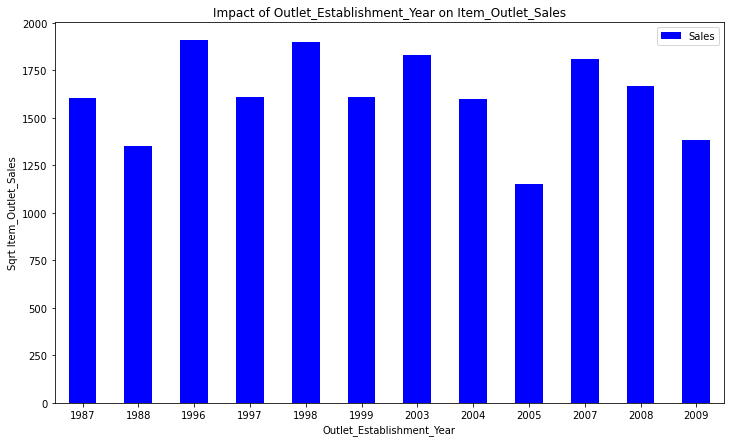

In [26]:
Outlet_Establishment_Year_pivot = df.pivot_table(index='Outlet_Year', values="Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")

plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)

plt.show()

In this we can see that most of the sales are skewed to the right and are concentrated around 1000 range. Ideally higher sales is expected for more profit. By identifying the root cause for the lower distribution of sales, right approaches can be undertaken in order to increase the same.

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

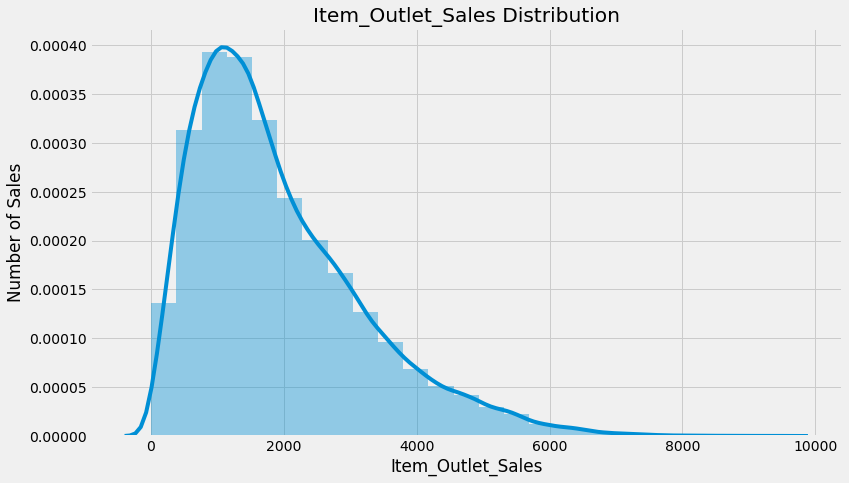

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

## What is Skew and Kurtosis?

Skewness: It determines whether the majority of data points are present on one side of the distribution. A positive value represents right skewed distribution, negative value represents left skewed and zero represents unskewed data. Since we have received a positive value we can confirm along with our graph that in our problem statement, the sales column is indeed skewed to the right.

Kurtosis: It indicates how much of data is concentrated around mean or shape of the probability distribution. If the value of Kurtosis is greater than 1 or lesser than 1 then the data is said to be highly skewed. This seems to be the case for our dataset as well.

In [28]:
print ("Skew is:", df.Sales.skew())
print("Kurtosis: %f" % df.Sales.kurt())

Skew is: 1.1357741465689362
Kurtosis: 1.308049


Let us now combine the items based on the unique IDs assigned to them. Items are categorized into three groups:

(1) FD - Food

(2) NC - Non-Consumables

(3) DR - Drinks

By doing this we can analyze how the the mart is faring with respect to the item categories present.

In [29]:
df['Items_Combined'] = df['Item_ID'].apply(lambda x: x[0:2])

df['Items_Combined'] = df['Items_Combined'].map({'FD':'Food', 'NC':'Non-Consumables', 'DR':'Drinks'})
df['Items_Combined'].value_counts()

<ipython-input-29-acd9f72e2412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Items_Combined'] = df['Item_ID'].apply(lambda x: x[0:2])
<ipython-input-29-acd9f72e2412>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Items_Combined'] = df['Items_Combined'].map({'FD':'Food', 'NC':'Non-Consumables', 'DR':'Drinks'})


Food               63337
Non-Consumables    16586
Drinks              7543
Name: Items_Combined, dtype: int64

We can see that "Food" and "Non-Consumables" are doing well, whereas "Drinks" category seems to be down on sales. This can be understandable since people purchase food items on regular basis and other non-consumable items for everyday needs. Whereas Drinks such as milk is usually purchased in the nearby milk booth or other smaller shops and soft drinks are generally purchased for special occasions or during the summer. Thus this can attribute to the lower sales in this category.

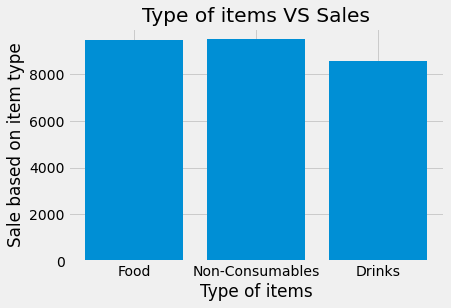

In [30]:
plt.bar(df["Items_Combined"],df["Sales"])
plt.title('Type of items VS Sales')
plt.xlabel('Type of items')
plt.ylabel('Sale based on item type')
plt.show()

## Conclusion

From this simple preliminary analysis we saw how various factors such as "Outlet Location type" and "Outlet Location Size" have more direct impact on sales compared to other features in the dataset. By having more features we can find the insights on a more granular level, and based on the analysis, actionable steps can be recommended to increase the sales, thus increasing the profits.